In [114]:
import numpy as np
Vin = np.random.uniform(low=0.0, high=1.0, size=100)
G = np.random.uniform(low=10e-6, high=100e-6, size=100)
G_2=np.random.uniform(low=10e-6, high=100e-6, size=100)
Gwire=1000

Q1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


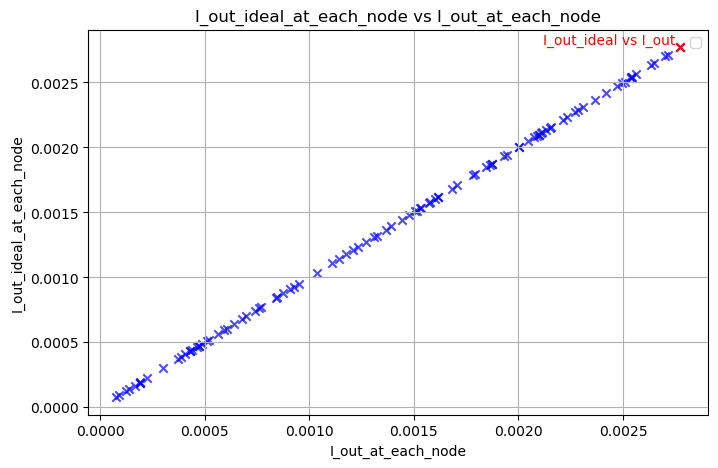

In [115]:
import matplotlib.pyplot as plt
I=Vin*G
I_node=np.cumsum(I)
I_2=Vin*G_2
I_node_2=np.cumsum(I_2)


max_y_value = I_node[-1]


# Plot results


# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(I_node, I_node, color='blue', alpha=0.7,marker='x')
plt.scatter(max_y_value, max_y_value, color='red', zorder=5, marker='x')
plt.text(max_y_value, max_y_value, "I_out_ideal vs I_out ", fontsize=10, ha='right', va='bottom', color='red')
plt.xlabel('I_out_at_each_node')
plt.ylabel('I_out_ideal_at_each_node')
plt.title('I_out_ideal_at_each_node vs I_out_at_each_node')
plt.legend()
plt.grid()
plt.show()

Q2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0011854138737300767


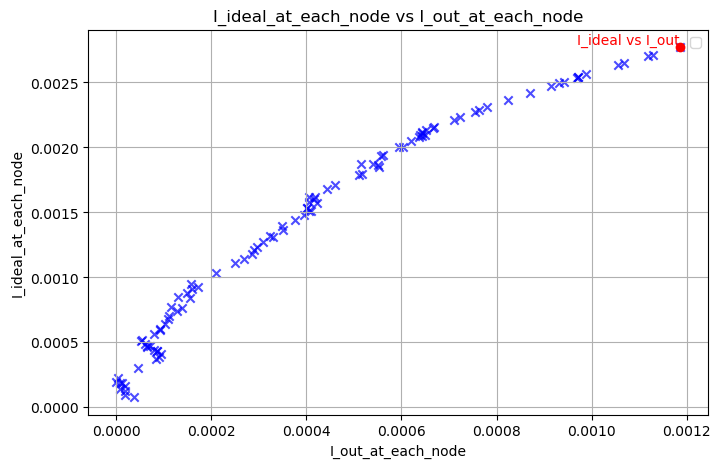

In [116]:
import numpy as np

def calc_Iout_b(Vin, G, Gwire,N=100):
    
    
    #solve A@V=b which explained in my handwritten
    A = np.zeros((N, N), dtype=float)
    b = np.zeros(N,     dtype=float)
    
   
    A[0, 0] = Gwire + G[0]
    A[0, 1] = -Gwire
    b[0]    = G[0]*Vin[0]
    
   
    for i in range(1, N-1):
        A[i, i-1] = -Gwire
        A[i, i  ] = 2*Gwire + G[i]
        A[i, i+1] = -Gwire
        b[i]      = G[i]*Vin[i]
    

   
    A[N-1, N-2] = -Gwire
    A[N-1, N-1] = 2*Gwire + G[N-1]

    b[N-1] = G[N-1]*Vin[N-1]
    

    V= np.linalg.solve(A, b)
    V=np.append(V,0)
    re=[(V[i]-V[i+1])*Gwire for i in range(100)]
    

    return re

I_node_q2=calc_Iout_b(Vin, G, 0.1)
print(I_node_q2[-1])
max_y_value = I_node[-1]
max_y_value_2=I_node_q2[-1]

# Plot results


# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(I_node_q2, I_node, color='blue', alpha=0.7,marker='x')
plt.scatter(max_y_value_2, max_y_value, color='red', zorder=5)
plt.text(max_y_value_2, max_y_value, "I_ideal vs I_out", fontsize=10, ha='right', va='bottom', color='red')

plt.xlabel('I_out_at_each_node')
plt.ylabel('I_ideal_at_each_node')
plt.title('I_ideal_at_each_node vs I_out_at_each_node')
plt.legend()
plt.grid()
plt.show()

Q3

In [117]:
import numpy as np
import numpy as np

def calc_Iout_c_1(Vin, G, Gwire,N=100):
    
    
    #solve A@V=b which explained in my handwritten
    A = np.zeros((N, N), dtype=float)
    b = np.zeros(N,     dtype=float)
    
   
    A[0, 0] = Gwire + G[0]
    A[0, 1] = -Gwire
    b[0]    = G[0]*Vin[0]
    
   
    for i in range(1, N-1):
        A[i, i-1] = -Gwire
        A[i, i  ] = 2*Gwire + G[i]
        A[i, i+1] = -Gwire
        b[i]      = G[i]*Vin[i]
    

   
    A[N-1, N-2] = -Gwire
    A[N-1, N-1] = 2*Gwire + G[N-1]

    b[N-1] = G[N-1]*Vin[N-1]+Gwire*0.05
    

    V= np.linalg.solve(A, b)
    V=np.append(V,0.05)

    re=[(V[i]-V[i+1])*Gwire for i in range(100)]
    

    return re


def calc_Iout_c_2(Vin, G, Gwire,N=100):
    
    
    #solve A@V=b which explained in my handwritten
    A = np.zeros((N, N), dtype=float)
    b = np.zeros(N,     dtype=float)
    
   
    A[0, 0] = Gwire + G[0]
    A[0, 1] = -Gwire
    b[0]    = G[0]*Vin[0]
    
   
    for i in range(1, N-1):
        A[i, i-1] = -Gwire
        A[i, i  ] = 2*Gwire + G[i]
        A[i, i+1] = -Gwire
        b[i]      = G[i]*Vin[i]
    

   
    A[N-1, N-2] = -Gwire
    A[N-1, N-1] = 2*Gwire + G[N-1]

    b[N-1] = G[N-1]*Vin[N-1]
    

    V= np.linalg.solve(A, b)
    V=np.append(V,0)
    
    re=[(V[i]-V[i+1])*Gwire for i in range(100)]
    

    return re


Gp=G_2*0.1/(G_2+0.1)#right_column_G is another uniformly randomly selected
I_outc_1=calc_Iout_c_1(Vin,G,0.1)
I_outc_2=calc_Iout_c_2(Vin, Gp, 0.1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


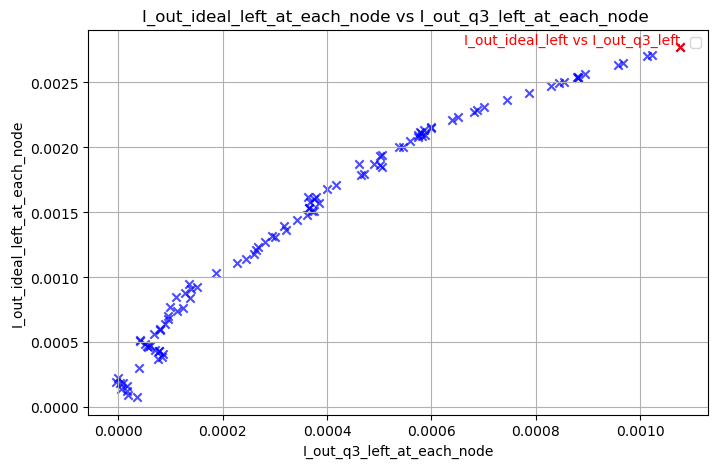

In [118]:
max_y_value = I_node[-1]

max_y_value_2=I_outc_1[-1]

# Plot results


# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(I_outc_1, I_node, color='blue', alpha=0.7,marker='x')
plt.scatter(max_y_value_2, max_y_value, color='red', zorder=5, marker='x')
plt.text(max_y_value_2, max_y_value, "I_out_ideal_left vs I_out_q3_left", fontsize=10, ha='right', va='bottom', color='red')

plt.xlabel('I_out_q3_left_at_each_node')
plt.ylabel('I_out_ideal_left_at_each_node')
plt.title('I_out_ideal_left_at_each_node vs I_out_q3_left_at_each_node ')
plt.legend()
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


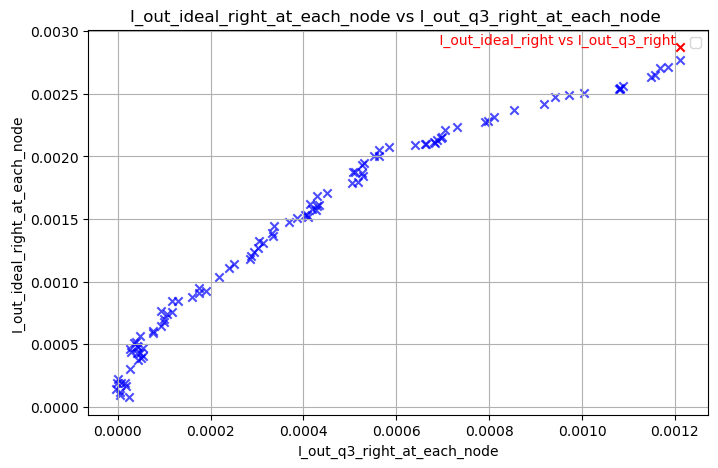

In [119]:
max_y_value = I_node_2[-1]

max_y_value_2=I_outc_2[-1]

# Plot results


# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(I_outc_2, I_node, color='blue', alpha=0.7,marker='x')
plt.scatter(max_y_value_2, max_y_value, color='red', zorder=5, marker='x')
plt.text(max_y_value_2, max_y_value, " I_out_ideal_right vs I_out_q3_right ", fontsize=10, ha='right', va='bottom', color='red')

plt.xlabel('I_out_q3_right_at_each_node')
plt.ylabel('I_out_ideal_right_at_each_node')
plt.title('I_out_ideal_right_at_each_node vs I_out_q3_right_at_each_node ')
plt.legend()
plt.grid()
plt.show()

In [120]:
print(I_outc_1[-1],I_outc_2[-1])
print(I_node[-1])

0.0010763124088164072 0.0012108828619900724
0.002771956796896253
